In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv('/Users/JoyceShiah/Downloads/trends.csv')
print(df.head())
print(df.info())

print(df.describe())

  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
None
               year         rank
count  26955.000000  26955.00000
mean    2015.243369      3.00000
std        3.564683      1.41424
min     2001.000000      1.00000
25%     2013.000000      2.00000
50%     2016.000000      3.00000
75%     2018.000000      4.00000
max     2020.000000      

# Data Exploration (Pandas)

In [30]:
print(df.isnull().sum())

location    0
year        0
category    0
rank        0
query       0
dtype: int64


Since `location`, `category` and `query` columns are pre-filled, structured text, can check for unique values and its counts. 

In [31]:
# unique 'location' values
print(df['location'].value_counts())

# unique 'category' values
print(df['category'].value_counts())

# unique 'query' column (for trending search terms)
print(df['query'].value_counts())


location
United States         2070
Global                1135
Japan                  765
Canada                 690
Brazil                 675
                      ... 
Dominican Republic       5
El Salvador              5
Honduras                 5
Kuwait                   5
Sudan                    5
Name: count, Length: 83, dtype: int64
category
People                                             760
Searches                                           620
Movies                                             330
TV Shows                                           305
Películas                                          250
                                                  ... 
Snelst stijgende/ Les plus grandes progressions      5
Küche & Kochen                                       5
Krisen & Katastrophen                                5
Suchanfragen Top 10                                  5
Là Gì?                                               5
Name: count, Length: 2450, dtype: int64
qu

### Show top 10 categories and its counts every year

In [32]:
category_trends = df.groupby(['year', 'category']).size().reset_index(name='count')

# per year, sort categories by count and pick the top 10
top_categories_per_year = category_trends.groupby('year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
print(top_categories_per_year)

     year            category  count
0    2001     Consumer Brands      5
1    2001  MP3 Music Services      5
2    2001                 Men      5
3    2001              Movies      5
4    2001        Music Groups      5
..    ...                 ...    ...
187  2020   Los que se fueron     25
188  2020                Loss     25
189  2020             Recetas     25
190  2020             Recipes     25
191  2020            Searches     25

[192 rows x 3 columns]


/var/folders/6k/rhyhn5ps2jj8zjfvkgv2h9680000gp/T/ipykernel_4252/4285011302.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Show top 10 queries and its counts every year

In [33]:
query_trends = df.groupby(['year', 'query']).size().reset_index(name='count')
top_queries_per_year = query_trends.groupby('year').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)
print(top_queries_per_year)


     year             query  count
0    2001           Aaliyah      1
1    2001             Adobe      1
2    2001            Amazon      1
3    2001   Anna Kournikova      1
4    2001       Audiogalaxy      1
..    ...               ...    ...
195  2020  Chadwick Boseman     17
196  2020  Google Classroom     17
197  2020       Kim Jong Un     17
198  2020      Donald Trump     16
199  2020      George Floyd     16

[200 rows x 3 columns]


/var/folders/6k/rhyhn5ps2jj8zjfvkgv2h9680000gp/T/ipykernel_4252/2882351463.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Count number of trends per year

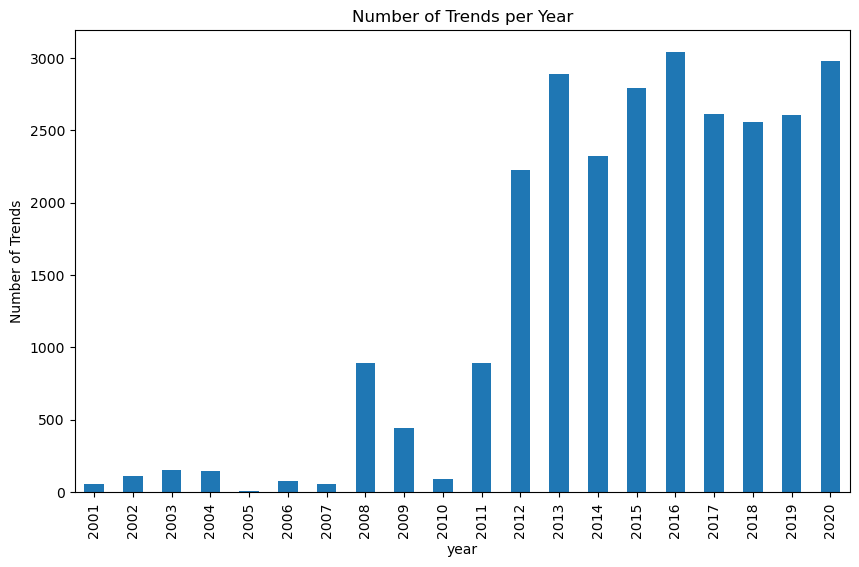

In [34]:
yearly_trends = df['year'].value_counts().sort_index()

yearly_trends.plot(kind='bar', figsize=(10, 6), title="Number of Trends per Year")
plt.ylabel('Number of Trends')
plt.show()


### Count & Plot number of trends per `location` (country)

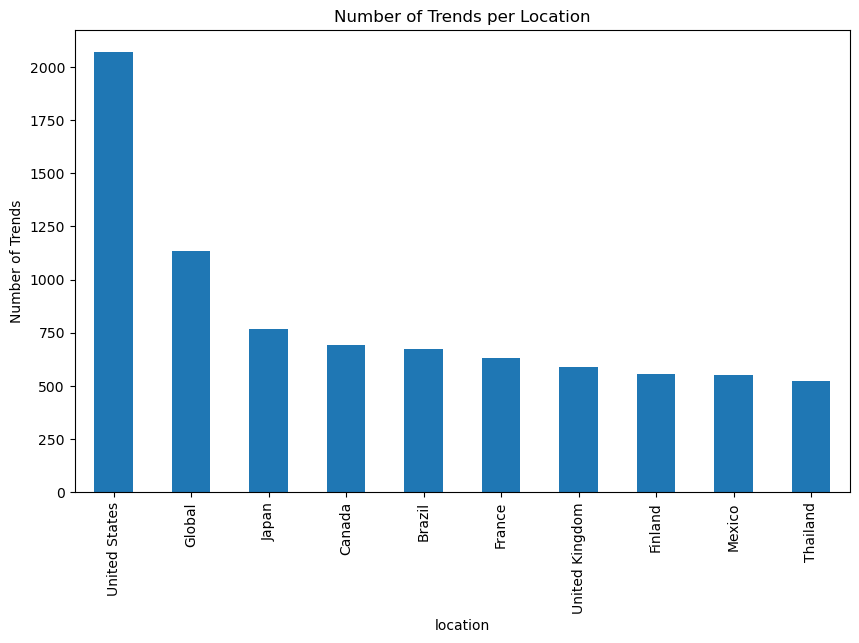

In [35]:
# count number of trends per location (country)
country_trends = df['location'].value_counts().head(10)  # Top 10 locations

# plot number of trends per location
country_trends.plot(kind='bar', figsize=(10, 6), title="Number of Trends per Location")
plt.ylabel('Number of Trends')
plt.show()

### Count & Plot OVERALL number of trends per `Category`
- 2001 - 2020 

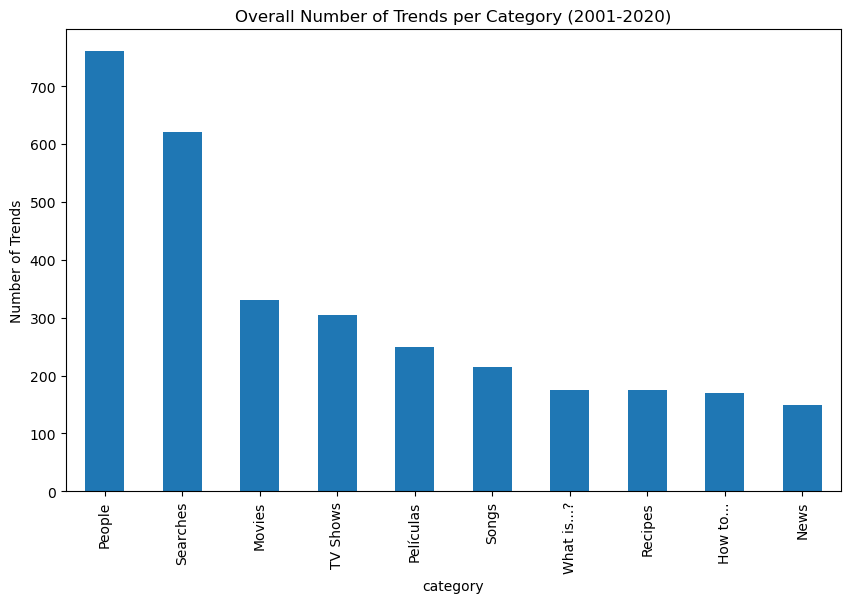

In [36]:
category_trends = df['category'].value_counts().head(10)  # Top 10 categories

category_trends.plot(kind='bar', figsize=(10, 6), title="Overall Number of Trends per Category (2001-2020)")
plt.ylabel('Number of Trends')
plt.show()

### Finding most popular `query`'s OF ALL TIME (by counts, top 10)
- 2001 - 2020

In [37]:
query_counts = df['query'].value_counts().head(10)
query_counts

query
Paul Walker        84
Donald Trump       83
Facebook           62
Robin Williams     61
Whitney Houston    56
Coronavirus        55
Avicii             52
Kobe Bryant        48
Meghan Markle      47
Joe Biden          44
Name: count, dtype: int64

### How rank is sorted: lower `rank` value (e.g., 1) = more frequently searched `query`

In [38]:
consumer_brands_trends = df[df['category'] == 'Consumer Brands']

# top 10 queries by rank within this category
top_consumer_brands = consumer_brands_trends.sort_values(by='rank').head(10)
top_consumer_brands[['query', 'rank', 'year']]

,query,rank,year
0,Nokia,1,2001
65,Ferrari,1,2002
175,Ferrari,1,2003
340,eBay,1,2004
1,Sony,2,2001
66,Sony,2,2002
176,Sony,2,2003
341,Walmart,2,2004
2,BMW,3,2001
342,MapQuest,3,2004


In [39]:
# group by year and category, count occurrences of each combination
category_trends = df.groupby(['year', 'category']).size().reset_index(name='count')

# sort by count within each year
category_trends_sorted = category_trends.sort_values(['year', 'count'], ascending=[True, False])

# Visuals Exploration

#### filter for a specific query (e.g., "Nokia")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



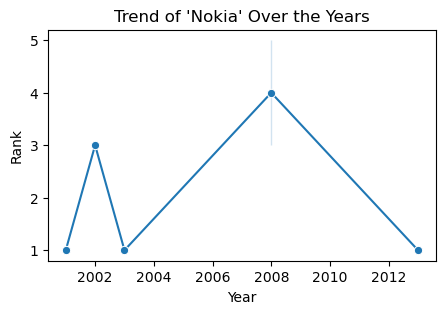

In [40]:
specific_query_trends = df[df['query'] == 'Nokia']

plt.figure(figsize=(5, 3))
sns.lineplot(data=specific_query_trends, x='year', y='rank', marker='o')
plt.title("Trend of 'Nokia' Over the Years")
plt.ylabel('Rank')
plt.xlabel('Year')
plt.show()

#### show top 10 categories based on total count OF ALL TIME (in dataset)
- 2001 - 2020

In [41]:
top_categories = category_trends.groupby('category')['count'].sum().nlargest(10).index
filtered_data = category_trends[category_trends['category'].isin(top_categories)]

fig = px.line(filtered_data, 
              x='year', 
              y='count', 
              color='category', 
              title='Top Categories Searched Across ALL Years in Dataset (2001-2020)', 
              labels={'year': 'Year', 'count': 'Number of Searches'},
              line_group='category',
              hover_name='category')

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=2001, dtick=1),  
    template='plotly_dark', 
    hovermode='x unified',  # show hover info for all lines on the same x-axis value
    showlegend=True
)

fig.show()

## Write-up Outline:
2 interactive elements:
- hover effect on a bar = shows info on: `Category`, `Year`, `# of Searches`
- Play/ Pause buttons
    - Frame duration controlled by user Playing/ Pausing with the buttoms
- x-axis is entirely animated, so data bars for each category are dynamically changing as years go on.

In [42]:
# Sanity Check

# print(filtered_data.head())
# print(filtered_data.shape)
# print(top_categories)
# print(filtered_data.dtypes)
print(filtered_data.shape) 
print(filtered_data.head())  

(107, 3)
    year  category  count
3   2001    Movies      5
9   2001  TV Shows      5
20  2002    Movies      5
25  2002  Searches      5
26  2002  TV Shows      5


# Chosen Graph to use

### **Note to self**: `showlegend` is currently set as `True`, but does it seems redundant?
- Pls ask Prof/ TA about the usefulness of having this color-coding legend.

In [43]:
# group by year and category, count the occurrences
category_trends = df.groupby(['year', 'category']).size().reset_index(name='count')

# top 10 categories will be shown at all times on the y-axis
top_categories = category_trends.groupby('category')['count'].sum().nlargest(10).index

# filter to only include top categories
filtered_data = category_trends[category_trends['category'].isin(top_categories)]

all_years = pd.DataFrame({'year': category_trends['year'].unique()})
all_categories = pd.DataFrame({'category': top_categories})

complete_data = all_years.assign(key=1).merge(all_categories.assign(key=1), on='key').drop('key', axis=1)

final_data = complete_data.merge(filtered_data, on=['year', 'category'], how='left').fillna(0)

final_data['year'] = final_data['year'].astype(int)
final_data['count'] = final_data['count'].astype(int)

fig = px.bar(final_data, 
              x='count', 
              y='category', 
              color='category', 
              title='Top Categories Searched Across ALL Years in Dataset (2001-2020)', 
              labels={'year': 'Year', 'count': 'Number of Searches'},
              animation_frame='year', 
              range_x=[0, final_data['count'].max() + 10],  
              orientation='h')  

fig.update_layout(
    yaxis=dict(title='Categories'),
    xaxis=dict(title='Number of Searches'),
    template='plotly_dark',
    showlegend=True,
    updatemenus=[  
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate'}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }
    ]
)
fig.show()

## 11/29 Create & save `final_data`, use directly in `js_visual.js`

In [44]:
final_data.columns

Index(['year', 'category', 'count'], dtype='object')

In [47]:
final_data.head()
type(final_data)
final_data
# len(filtered_data)
# filtered_data.head()   

,year,category,count
0,2001,People,0
1,2001,Searches,0
2,2001,Movies,5
3,2001,TV Shows,5
4,2001,Películas,0
...,...,...,...
195,2020,Songs,5
196,2020,Recipes,25
197,2020,What is...?,5
198,2020,How to...,10


In [48]:
# Convert final_data to JSON
json_data = final_data.to_json(orient='records')  # use 'records' to get most simple, row-by-row structure
print(json_data)

[{"year":2001,"category":"People","count":0},{"year":2001,"category":"Searches","count":0},{"year":2001,"category":"Movies","count":5},{"year":2001,"category":"TV Shows","count":5},{"year":2001,"category":"Pel\u00edculas","count":0},{"year":2001,"category":"Songs","count":0},{"year":2001,"category":"Recipes","count":0},{"year":2001,"category":"What is...?","count":0},{"year":2001,"category":"How to...","count":0},{"year":2001,"category":"News","count":0},{"year":2002,"category":"People","count":0},{"year":2002,"category":"Searches","count":5},{"year":2002,"category":"Movies","count":5},{"year":2002,"category":"TV Shows","count":5},{"year":2002,"category":"Pel\u00edculas","count":0},{"year":2002,"category":"Songs","count":0},{"year":2002,"category":"Recipes","count":0},{"year":2002,"category":"What is...?","count":0},{"year":2002,"category":"How to...","count":0},{"year":2002,"category":"News","count":0},{"year":2003,"category":"People","count":0},{"year":2003,"category":"Searches","cou

other version of the graphic, but not showing all 10 at once always. 
- since the earlier years do not have as many searches on variety of topics compared to the later years (2010's-20's)

In [16]:
# other version 

category_trends = df.groupby(['year', 'category']).size().reset_index(name='count')

top_categories = category_trends.groupby('category')['count'].sum().nlargest(10).index

filtered_data = category_trends[category_trends['category'].isin(top_categories)]

filtered_data = filtered_data.fillna(0)

filtered_data['year'] = filtered_data['year'].astype(int)
filtered_data['count'] = filtered_data['count'].astype(int)

filtered_data = filtered_data.sort_values(['year', 'count'], ascending=[True, False])

fig = px.bar(filtered_data, 
             x='count',  
             y='category', 
             color='category', 
             orientation='h',  
             title='Top 10 Categories Searched Across the Years (2001-2020)', 
             labels={'year': 'Year', 'count': 'Number of Searches'},
             animation_frame='year',  
             animation_group='category',  
             range_x=[0, filtered_data['count'].max() + 50], 
             height=600  
            )

fig.update_layout(
    template='plotly_dark',  
    hovermode='x unified', 
    showlegend=False, 
    updatemenus=[  
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                }
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }
    ]
)
fig.show()

## ASK PROF/ TA:
- @ visual: `showlegend` is currently set as `True`, but it seems redundant. 
    - ask about the usefulness of having this color-coding legend.
- data harmonization techniques, is there enough time to fine-tune with NLP models?
- does animating a visual count as an interactive element? 

**next steps for joyce: implement these in D3.js now**

### Data Harmonization (an attempt) --> might become a "what-if?"
**Issue**: It seems that it's detecting English company names (proper nouns) as Non-English words

In [17]:
from langdetect import detect
import re

# to tackle the Issue
known_brands = ['Apple', 'Microsoft', 'Google', 'Nokia', 'Samsung', 'Sony', 'BMW', 'Adobe', 'Amazon', 'Adobe']  

# attempt to ignore company names and product names
def is_non_english(text):
    try:
        # if text is in list of known brands
        if any(brand in text for brand in known_brands):
            return False

        if text.isupper() or bool(re.search(r'\d', text)):
            return False  

        return detect(text) != 'en'
    except:
        return False  

non_english_categories = df[df['category'].apply(is_non_english)]
non_english_queries = df[df['query'].apply(is_non_english)]

print("Non-English Categories:")
print(non_english_categories[['category']].drop_duplicates())

print("Non-English Queries:")
print(non_english_queries[['query']].drop_duplicates())


Non-English Categories:
           category
5               Men
10           Movies
35        Retailers
50      Video Games
55            Women
...             ...
26925        Ở Đâu?
26935       Gần Đây
26940      Cách Làm
26945  Như Thế Nào?
26950        Là Gì?

[1894 rows x 1 columns]
Non-English Queries:
                     query
3                     Palm
5              Nostradamus
6          Osama bin Laden
7                   Eminem
9             Howard Stern
...                    ...
26950   Virus Corona là gì
26951  Miễn thị thực là gì
26952    Đầu cắt moi là gì
26953  Bệnh bạch hầu là gì
26954       Đông Lào là gì

[13573 rows x 1 columns]
